<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/2_vgg/1.3)%20Intro%20to%20vgg%20network%20-%20keras%20backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Train a architectural heritage site classifier using vgg16

### Understand what lies inside vgg network

# What is vgg

## Readings on vgg

  1) Points from https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c
    - VGG addresses another very important aspect of CNNs: depth
    - All of VGG’s hidden layers use ReLU
    - Unlike 11x11 kernels of alexnet, it uses smaller ones 1x1 and 3x3 kernels


  2) Points from https://becominghuman.ai/what-is-the-vgg-neural-network-a590caa72643
    - Intuitively, more layer is better. However, the authors found that VGG-16 is better than VGG-19
    - Authors introduce multi-scale evaluationin the paper
  
  
  3) Read more here - 
    - https://arxiv.org/abs/1409.1556
    - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    - https://www.cs.toronto.edu/~frossard/post/vgg16/
    - https://d2l.ai/chapter_convolutional-modern/vgg.html


# Table of Contents


## [0. Install](#0)


## [1. Load experiment with vgg base architecture](#1)


## [2. Visualize vgg](#2)


## [3. Train the classifier](#3)


## [4. Run inference on trained classifier](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [5]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 2105 (delta 110), reused 116 (delta 53), pack-reused 1905
Receiving objects: 100% (2105/2105), 73.71 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (1130/1130), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Architectural Heritage site Classification
    - https://old.datahub.io/dataset/architectural-heritage-elements-image-dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MFu7cnxwDM7LWKgeLggMLvWIBW_-YCWC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MFu7cnxwDM7LWKgeLggMLvWIBW_-YCWC" -O architectural_heritage.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq architectural_heritage.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
#Using keras backend 
from keras_prototype import prototype

<a id='1'></a>
# Load experiment with vgg base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [4]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "vgg-intro");

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Project
    Experiment: vgg-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----vgg-intro
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    architectural_heritage
        |
        |-----train
                |------dome
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------altal
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------dome
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------altal
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [5]:
gtf.Default(dataset_path="architectural_heritage/train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     architectural_heritage/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 7169 images belonging to 10 classes.
Found 3066 images belonging to 10 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 7169
    Num val images:   3066
    Num classes:      10

Model Params
    Model name:           vgg16
    Use Gpu:              True
    Gpu Memory Fraction:  0.6
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num la

## From the summary above

    - Model Params
        Model name:                           vgg16
        Num of potentially trainable layers:  15
        Num of actual trainable layers:       15

<a id='2'></a>
# Visualize vgg

  - Keras has a different style of vgg16 as compared to pytorch and mxnet
  - There are many variants of networks so there is no such thing as a correct network

In [11]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks

Stopping http://localhost:8082
Serving 'final.h5' at http://localhost:8082


## vgg block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

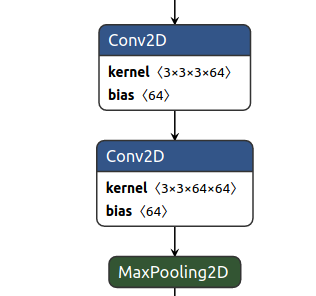

In [7]:
from IPython.display import Image
Image(filename='imgs/vgg_block1_keras.png') 

## Properties

  - This block has 3 layers
        - conv -> conv -> max_pool

## vgg block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

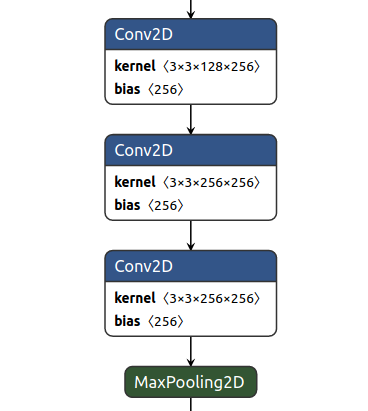

In [8]:
from IPython.display import Image
Image(filename='imgs/vgg_block2_keras.png') 

## Properties

  - This block has 4 layers
        - conv -> conv -> conv -> max_pool

## vgg fully connected chain

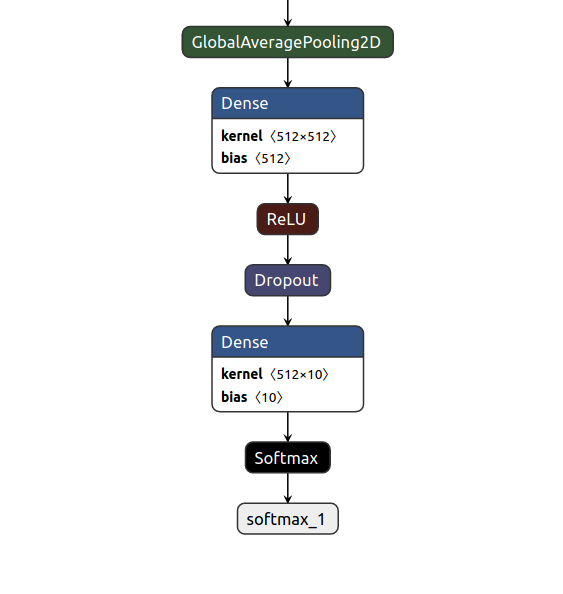

In [9]:
from IPython.display import Image
Image(filename='imgs/vgg_block_fc_keras.png') 

## vgg Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

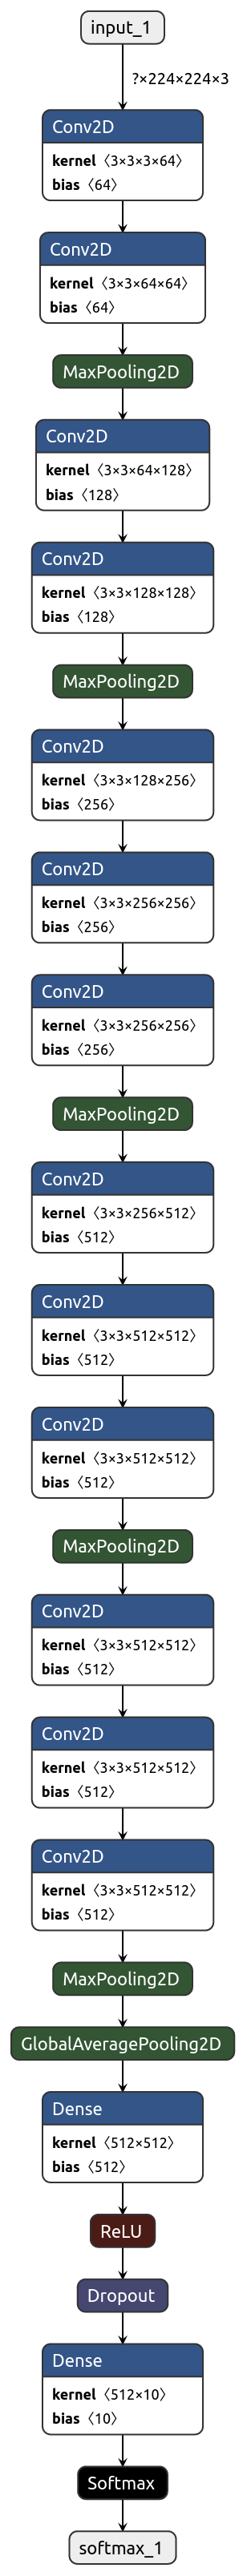

In [10]:
from IPython.display import Image
Image(filename='imgs/vgg16_keras.png') 

## Properties

  - This network 
    - has 3 type-1 blocks
    - has 2 type-2 blocks
    - post these blocks the type-3 (fc) block exists


<a id='3'></a>
# Train the classifier

In [12]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
1792/1792 [==============================] - 146s 81ms/step - loss: 0.8620 - acc: 0.7342 - val_loss: 0.2648 - val_acc: 0.9184

Epoch 00001: saving model to workspace/Project/vgg-intro/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.26480, saving model to workspace/Project/vgg-intro/output/models/best_model.h5

Epoch 00001: saving model to workspace/Project/vgg-intro/output/models/intermediate_model_01.h5
Epoch 2/5
1792/1792 [==============================] - 141s 79ms/step - loss: 0.2814 - acc: 0.9167 - val_loss: 0.1915 - val_acc: 0.9445

Epoch 00002: saving model to workspace/Project/vgg-intro/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.26480 to 0.19150, saving model to workspace/Project/vgg-intro/output/models/best_model.h5

Epoch 00002: saving model to workspace/Project/vgg-intro/output/models/intermediate_model_02.h5
Epoch 3/5
1792/1792 [==============================] - 143s 80ms/step - loss: 0.1759 - ac

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Run inference on trained classifier

In [13]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "vgg-intro", eval_infer=True);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Project/vgg-intro/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Project
    Experiment: vgg-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/



Prediction
    Image name:         architectural_heritage/test/test1.jpg
    Predicted class:      bell_tower
    Predicted score:      0.9460011124610901



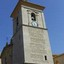

In [16]:
output = gtf.Infer(img_name = "architectural_heritage/test/test1.jpg");
from IPython.display import Image
Image(filename='architectural_heritage/test/test1.jpg') 

Prediction
    Image name:         architectural_heritage/test/test2.jpg
    Predicted class:      vault
    Predicted score:      0.9999663829803467



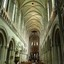

In [14]:
output = gtf.Infer(img_name = "architectural_heritage/test/test2.jpg");
from IPython.display import Image
Image(filename='architectural_heritage/test/test2.jpg') 

Prediction
    Image name:         architectural_heritage/test/test3.jpg
    Predicted class:      dome(outer)
    Predicted score:      0.999998927116394



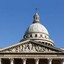

In [15]:
output = gtf.Infer(img_name = "architectural_heritage/test/test3.jpg");
from IPython.display import Image
Image(filename='architectural_heritage/test/test3.jpg') 